#Pima Indians Onset of Diabetes Deep Learning & Keras

**Dataset Used:** Pima Indians onset of diabetes dataset (CSV).

**Data Source:** UCI Machine Learning repository. 

**Data Overview**: N = 758 patients

It describes patient medical record data for female (at least 21 years of age) Pima Indians and whether they had an onset of diabetes within five years.

**Problem Type:** binary classification problem (onset of diabetes as 1 or not as 0)

**Input Variables (X):**

1) Number of times pregnant
2) Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3) Diastolic blood pressure (mm Hg)
4) Triceps skin fold thickness (mm)
5) 2-Hour serum insulin (mu U/ml)
6) Body mass index (weight in kg/(height in m)^2)
7) Diabetes pedigree function
8) Age (years)

**Output Variable (y):**

Class variable (0 or 1)

#Use Case

I've been hired by a U.S. non-profit medical group (Pima Care) to create a model they can use to evaluate additional Pima Indians (population = 19,000) for the onset of diabetes. Their mission is to help prevent diabetes via early detection and to determine the at-risk females in the population. The medical group plans on providing diabetes prevention education and treatments to the at-risk females. They have collected 768 rows of anonymous patient data and have provided me the CSV file. 

**Phase 1 Deliverable:** A model that, based on the inputs defined above, will predict whether or not a new Pima Indian patient has the onset of diabetes. The medical team has advised it must have an accuracy of *at least 90*%. 

**Phase 2 Deliverable (not included in this project):** An easy-to-use mobile application where clinicians can enter the inputs on their laptops and/or mobile devices. It does **not** require Internet as the locations where additional testing may occur may have little to no cell phone signal.The application should be easy for users to update with a mobile signal though.

#Importing the Libraries

In [1]:
from numpy import loadtxt #You could also use Pandas to load the CSV file. 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# Load the Data

Please be sure to have the CSV file downloaded and available.



In [2]:
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

# Split the Data into X and y

The data will be stored in a 2D array where the first dimension is rows and the second dimension is columns.

I will split the array into two arrays (one for X and one for y) by selecting subsets of columns using the standard NumPy slice operator (:). To select the first 8 columns (the X inputs), I'll use [:, 0:8] which selects all rows ":" and all columns up to index [8] ([0:8]). To select the output column (the 9th column) I'll use [:, 8]. 


In [3]:
X = dataset[:,0:8] #selects all rows and all columns up to index [8] which is column 7.
y = dataset[:,8] #selects all rows and just column 8 (the last one)

In [4]:
# To make sure you sliced things properly, simply take a quick look. Notice the output is all 0's and 1's. Perfect! You can do this for X as well. 
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

# Define the Keras Model

Models in Keras are defined as a sequence of layers.

**Input Layer > Hidden Layers > Output Layer**

We create a Sequential model and add layers one at a time until we are happy with our network architecture. This is where experimentation comes into play. 

We need to make sure that the input layer has the right number of input features (X variables). input_dim = 8 since we have 8 features (independent variables X). 

* Activation parameter: The activation function in the hidden layers of a fully connected neural network must be the Rectified Linear Unit activation function which is called 'relu'. 

In [5]:
model = Sequential()
model.add(Dense(18, input_dim = 8, activation = 'relu')) #This line defines the input or visible layer AND the first hidden layer
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid')) 
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                162       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 152       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________
None


# Visualize the Model

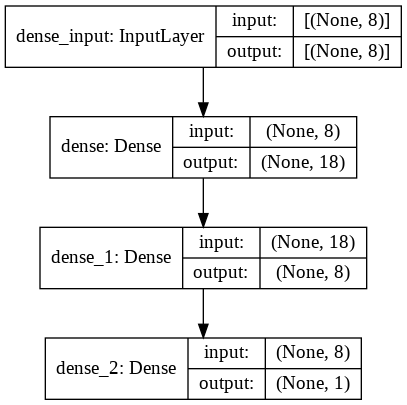

In [6]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#Compile Keras Model

**parameters:**

***optimizer:*** 'adam' optimizer - can perform stochastic gradient descent; the optimizer will update the weights through stochastic gradient descent to hopefully reduce the loss in the next iteration.

***loss***: for binary classification, the loss fxn must be 'binary_crossentropy'. If doing non-binary classification, we would need to enter a categorial crossentropy. For non-binary class, the activation should be 'softmax'.

***metrics***: We can chose several at the same time but we'll only need 'accuracy' in square brackets.



In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the Keras Model 

We will now show the model some data.

We can train (fit) our model on data by calling the fit() function.

Training occurs over epochs and each epoch is split into batches.

**epochs**: One pass through all of the rows in the training dataset. More epochs is not always better and too few can be dangerous. Start with 100. 

**batch_size**: One or more samples considered by the model within an epoch before weights are updated. A good starting point is bach_size = 32. Try smaller batches for smaller datasets like the one we're using here.

**verbose:** If you do not want to see the ephoch history, change verbose = 0. Otherwise verbose = 1. If you run into an error, change to verbose = 0 and rerun.

In [8]:
model.fit(X,y, epochs = 150, batch_size = 5, verbose = 1)

Epoch 1/150
154/154 [==============================] - 1s 1ms/step - loss: 35.9538 - accuracy: 0.3447
Epoch 2/150
154/154 [==============================] - 0s 1ms/step - loss: 1.9561 - accuracy: 0.3611
Epoch 3/150
154/154 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5910
Epoch 4/150
154/154 [==============================] - 0s 1ms/step - loss: 0.6663 - accuracy: 0.6525
Epoch 5/150
154/154 [==============================] - 0s 1ms/step - loss: 0.6651 - accuracy: 0.6345
Epoch 6/150
154/154 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.6871
Epoch 7/150
154/154 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 0.6890
Epoch 8/150
154/154 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.7008
Epoch 9/150
154/154 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.6889
Epoch 10/150
154/154 [==============================] - 0s 1ms/step - loss: 0.6275 - accur

# Evaluate Keras Model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ***ideally, you could separate your data into train and test datasets for training and evaluation of your model.***

You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

Ideally, we would like the loss to go to zero and accuracy to go to 1.0 (e.g. 100%). This is not possible for any but the most trivial machine learning problems. Instead, we will always have some error in our model. The goal is to choose a model configuration and training configuration that achieve the lowest loss and highest accuracy possible for a given dataset.

In [11]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100)) # %.2f' means "2 floating points". In other words, show the accuracy to two decimal points.

24/24 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.7708
Accuracy: 77.08


# Make New Predictions

After fitting, predictions are made for all rows in the dataset, and the input rows and predicted class value for the first 5 examples are printed and compared to the expected class value.

We would expect about 77% of the rows to be correctly predicted based on our estimated performance (accuracy) as shown above.

In [12]:
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


#Conclusion

This model's accuracy is only about 77%. Since the medical team has required an accuracy of at least 90%, I will have to continue to optimize the model as best as I can. 

**Things I can do to improve accuracy**:
1. Request additional patient records
2. Perhaps there's additional inputs/features (X values) I can include. I'll check with the client.
3. Modify the network architecture (hidden layers, neurons/nodes, etc.). The initial model started around 77% accuracy and with some tuning I was able to reach 80%. More tuning may be required. 
4. Try different models (Decision Tree, Random Forest, Support Vector Machine (SVM), Logistic Regression







#Credits

A special thanks to Dr. Jason Brownlee, PhD (Machine Learning Mastery) and Hadelin de Ponteves (Super Data Science) for providing various code and explanations. Also to the UC Irvine Machine Learning Repository https://archive.ics.uci.edu/ml/index.php for their original dataset.